#### **Objective:**

Program untuk mengelola dan menganalisis data untuk skema dropship dari platform Tokopedia yang dimana
prosesnya akan menggunakan metode *Web Scraping*. Pengelolahan data yang dilakukan adalah mengolah data dari *missing value* hingga mengubah bentuk data dari bentuk string menjadi integer. Untuk analisis data akan dilakukan dengan menggunakan metode *measurement of central tendency*, *measurement of dispersion* dan analisa distribusi data. Selain itu akan dilakukan uji coba pertanyaan yang nantinya akan dijawab dengan pendekatan statistika seperti analisa korelasi dan hipotesis. Adapun program akan dijabarkan berdasarkan pandangan bisnis  

---


Import *Package*

In [1]:
# Import Package
from selenium import webdriver
from bs4 import BeautifulSoup
from scipy import stats
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns


---

#### **Pengambilan Data Melalui *Web Scrapping***

--- 

Pada tahap ini akan dilakukan pengambilan data bedsarkan URL dari Tokopedia dengan menggunakan bantuan driver. Setalah data telah diambil, selanjutnya adalah mengubahnya dalam bentuk *dataframe* dan melakukan ekspor data dalam bentuk CSV 

---


##### Mengakses URL Data dengan Metode Driver

In [2]:
# Mengambil Driver Edge
driver = webdriver.Edge()

In [3]:
# Link yang Ingin Diakses
url = 'https://www.tokopedia.com/search?navsource=&page=1&q=seblak&srp_component_id=02.01.00.00&srp_page_id=&srp_page_title=&st='

# Akses
driver.get(url)

**Interpretasi #1:**

Berikut adalah sampel dari HTML yang telah dilakukan inspect element pada web yang ingin dilakukan metode web scrapping. Sampel data mengambil bentuk kotak dari contoh jualan seblak pada bagian kotak dan mengambil bagian bentuk `tag`, `attributes` dan `attribute value`

<a class="pcv3__info-content css-gwkf0u" href="https://ta.tokopedia.com/promo/v1/clicks/

##### Proses *Webscrapping* dan Menyimpan Data

In [4]:
# Variabel Untuk Menyimpan Hasil Scrapping
Nama_Produk = []
Harga_Produk = []
Penjual = []
Kota_Toko = []
Banyaknya_Terjual = []
Rating_Produk = []


# Akses Halaman dari 1-10
for no_halaman in range(1,11):
    url = f'https://www.tokopedia.com/search?navsource=&page={no_halaman}&q=seblak&srp_component_id=02.01.00.00&srp_page_id=&srp_page_title=&st='

    # Akses Halaman Menggunakan Metode Driver
    driver.get(url)
    
    # Menggunakan Metode Time Buat Loading Website
    time.sleep(10)
    
    # Ekstrak HTML Menggunakan Driver
    html = driver.page_source

    # Mengguraikan Ekstrak HTML
    soup = BeautifulSoup(html, 'html.parser')

    # Pengumpulan Data Melalui Elemen Kotak
    squares = soup.find_all('a', {'class' :"pcv3__info-content css-gwkf0u"})

    # Menggunakan Fungsi Perulangan Untuk Mengambil Data
    for box in squares:
        
        # Mengambil Element Nama Produk
        try:
            element_nama_produk = box.find('div', {'class' : 'prd_link-product-name css-3um8ox'})
            Nama_Produk.append(element_nama_produk.get_text())
        except:
            Nama_Produk.append(None)
        
        # Mengambil Element Harga
        try:
            element_harga_produk = box.find('div', {'class' : 'prd_link-product-price css-h66vau'})
            Harga_Produk.append(element_harga_produk.get_text())
        except:
            Harga_Produk.append(None)

        # Mengambil Element Penjual
        try:
            element_penjual = box.find('span', {'class' : "prd_link-shop-name css-1kdc32b flip"})
            Penjual.append(element_penjual.get_text())
        except:
            Penjual.append(None)
        
        # Mengambil Element Kota Toko
        try:
            element_kota_toko = box.find('span', {'class' : "prd_link-shop-loc css-1kdc32b flip"})
            Kota_Toko.append(element_kota_toko.get_text())
        except:
            Kota_Toko.append(None)
        
        # Mengambil Element Banyaknya Terjual
        try:
            element_banyaknya_terjual = box.find('span', {'class' : "prd_label-integrity css-1sgek4h"})
            Banyaknya_Terjual.append(element_banyaknya_terjual.get_text())
        except:
            Banyaknya_Terjual.append(None)
        
        # Mengambil Element Rating Produk
        try:
            element_rating_produk = box.find('span', {'class' : "prd_rating-average-text css-t70v7i"})
            Rating_Produk.append(element_rating_produk.get_text())
        except:
            Rating_Produk.append(None)

# Membuat Data Frame
data = pd.DataFrame()

# Masukkan Data
data["Nama Produk"] = Nama_Produk
data["Harga Produk"] = Harga_Produk
data["Penjual"] = Penjual
data["Kota Toko"] = Kota_Toko
data["Banyaknya Terjual"] = Banyaknya_Terjual
data["Rating Produk"] = Rating_Produk

# Simpan Data dalam Bentuk CSV
data.to_csv("Data_Web_Scrapping.csv", index=False)

**Interpretasi #2:**

Data yang diambil dari tokopedia adalah data makanan seblak. Parameter yang diambil adalah `Nama_Produk`, `Harga_Produk`, `Penjual`, 'Kota_Toko', `Banyaknya_Terjual`, `Rating_Produk` . Proses pengambilan data akan menggunakan metode try-except pada web scrapping dengan tujuan menangani situasi seperti koneksi internet yang buruk, perubahan dalam struktur halaman web, atau bahkan pemblokiran dari server situs web dapat terjadi. Selain itu digunakan metode time.sleep() agar data pada dataframe tidak terjadi tumpang tindih. Selanjutnya data akan diekspor ke dalam bentuk csv dengan nama Data_Web_Scrapping.csv

---





#### ***Data Preparation***

---

Sebelum data akan dianalisis, pada tahap ini akan dilakukan eksplorasi data yang nantinya akan dilakukan pencarian mengenai informasi data hingga menangani nilai *missing value* hingga nilai string pada data

---

##### Eksplorasi Data

In [5]:
# Membaca File CSV
df = pd.read_csv("Data_Web_Scrapping.csv", na_values=['N/A', 'NA'])

In [6]:
# Menampilkan 10 Data Teratas
df.head(10)

,Nama Produk,Harga Produk,Penjual,Kota Toko,Banyaknya Terjual,Rating Produk
0,Kylafood Paket (3 Seblak Original 2 Batagor ku...,Rp97.200,NaN,NaN,3 rb+ terjual,4.9
1,Kylafood Seblak karuhun,Rp11.880,NaN,NaN,4 rb+ terjual,4.8
2,Kylafood Seblak Mie Baso,Rp24.200,NaN,NaN,4 rb+ terjual,4.9
3,Kylafood Seblak Original,Rp19.800,kylafood,Bandung,10rb+ terjual,4.9
4,seblak instan jeletot jajanan hits bandung 1 p...,Rp4.180,tokomakanankalimantan,Jakarta Barat,1rb+ terjual,4.8
5,"Seblak Rafael, Seblak Coet Instan Halal",Rp23.750,Brother Meat Shop,Depok,500+ terjual,4.9
6,"Kylafood Seblak Rempah Autentik 115gr, Seblak ...",Rp9.900,Brother Meat Shop,Depok,100+ terjual,5.0
7,Kerupuk Seblak Pedas Krupuk Pelangi Pedas Sebl...,Rp14.725,toko bemo,Jakarta Timur,500+ terjual,4.9
8,"Seblak Rafael, Seblak Coet Instan Halal",Rp23.750,Brother Meat Shop,Depok,500+ terjual,4.9
9,SEBLAK INSTANT TERMURAH,Rp4.450,Pusat Cuankie & Cemilan Frozen,Jakarta Timur,10rb+ terjual,4.8


In [7]:
# Menampilkan 10 Data Terbawah
df.tail(10)

,Nama Produk,Harga Produk,Penjual,Kota Toko,Banyaknya Terjual,Rating Produk
365,"Kylafood Seblak Rempah Autentik 115gr, Seblak ...",Rp9.900,Brother Meat Shop,Depok,100+ terjual,5.0
366,"Seblak Rafael, Seblak Coet Instan Halal",Rp23.750,Brother Meat Shop,Depok,500+ terjual,4.9
367,SEBLAK INSTANT TERMURAH,Rp4.450,Pusat Cuankie & Cemilan Frozen,Jakarta Timur,10rb+ terjual,4.8
368,Seblak Instan Pedas Home Made,Rp3.500,the Dhecip,Tangerang Selatan,3rb+ terjual,4.9
369,Seblak Rafael/Seblak Coet Instan Halal,Rp26.600,Foodstocks,Jakarta Selatan,60+ terjual,5.0
370,[250 gr] Kerupuk Seblak Pedas,Rp11.500,CamilanJati,Kab. Sidoarjo,50+ terjual,5.0
371,Gelifood Seblak Instan Kerupuk Mawar Bumbu Ken...,Rp15.000,Lidigeli,Kab. Garut,250+ terjual,4.8
372,Geli Food Seblak Ceker Tanpa Tulang Super Peda...,Rp24.000,Lidigeli,Kab. Garut,100+ terjual,4.8
373,Seblak Instan Komplit Pedas Gurih Nikmat,Rp5.999,Baso Aci Ayang,Kab. Garut,3rb+ terjual,4.9
374,Seblak Instan Pedas Home Made,Rp3.500,the Dhecip,Tangerang Selatan,3rb+ terjual,4.9


In [8]:
# Menampilkan Data pada Rentang Tertentu
df.iloc[100:120]

,Nama Produk,Harga Produk,Penjual,Kota Toko,Banyaknya Terjual,Rating Produk
100,Gelifood Seblak Instan Kerupuk Mawar Bumbu Ken...,Rp15.000,Lidigeli,Kab. Garut,250+ terjual,4.8
101,"Kylafood Seblak Rempah Autentik 115gr, Seblak ...",Rp9.900,Brother Meat Shop,Depok,100+ terjual,5.0
102,"Seblak Rafael, Seblak Coet Instan Halal",Rp23.750,Brother Meat Shop,Depok,500+ terjual,4.9
103,SEBLAK INSTANT TERMURAH,Rp4.450,Pusat Cuankie & Cemilan Frozen,Jakarta Timur,10rb+ terjual,4.8
104,Seblak Instan Pedas Home Made,Rp3.500,the Dhecip,Tangerang Selatan,3rb+ terjual,4.9
105,Seblak Rafael/Seblak Coet Instan Halal,Rp26.600,Foodstocks,Jakarta Selatan,60+ terjual,5.0
106,[250 gr] Kerupuk Seblak Pedas,Rp11.500,CamilanJati,Kab. Sidoarjo,50+ terjual,5.0
107,Gelifood Seblak Instan Kerupuk Mawar Bumbu Ken...,Rp15.000,Lidigeli,Kab. Garut,250+ terjual,4.8
108,Geli Food Seblak Ceker Tanpa Tulang Super Peda...,Rp24.000,Lidigeli,Kab. Garut,100+ terjual,4.8
109,Seblak Instan Komplit Pedas Gurih Nikmat,Rp5.999,Baso Aci Ayang,Kab. Garut,3rb+ terjual,4.9


In [9]:
# Menampilkan Kolom pada Data
df.columns

Index(['Nama Produk', 'Harga Produk', 'Penjual', 'Kota Toko',
       'Banyaknya Terjual', 'Rating Produk'],
      dtype='object')

In [10]:
# Menampilkan Jumlh Baris dan Kolom
df.shape

(375, 6)

**Interpretasi #3:**

Data `Data_Web_Scrapping.csv` akan ditampilkan dengan mengunakan metode pandas dan akan didefenisikan sebagai df. Data ini berisi 375 baris dan 6 kolom. Pada data ini juga terdapat *missing value* pada sebagian kolom

---

##### Informasi Rangkuman Data

In [11]:
# Menampilkan Informasi Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Nama Produk        375 non-null    object 
 1   Harga Produk       375 non-null    object 
 2   Penjual            348 non-null    object 
 3   Kota Toko          348 non-null    object 
 4   Banyaknya Terjual  370 non-null    object 
 5   Rating Produk      363 non-null    float64
dtypes: float64(1), object(5)
memory usage: 17.7+ KB


In [12]:
# Menampilkan Informasi Statistik Data
df.describe()

,Rating Produk
count,363.000000
mean,4.894490
std,0.093268
min,4.400000
25%,4.800000
50%,4.900000
75%,5.000000
max,5.000000


In [13]:
#Menampilkan Jumlah Nilai Unik pada Data
df.nunique()

Nama Produk          121
Harga Produk          93
Penjual               72
Kota Toko             23
Banyaknya Terjual     31
Rating Produk          7
dtype: int64

In [14]:
# Menampilkan Nilai Unik pada Rating Produk
df.value_counts('Rating Produk')

Rating Produk
4.9    156
5.0    104
4.8     95
4.4      3
4.6      2
4.7      2
4.5      1
Name: count, dtype: int64

In [15]:
# Menampilkan Nilai Unik pada Kota Toko 
df.value_counts('Kota Toko')

Kota Toko
Depok                 57
Tangerang Selatan     52
Kab. Garut            47
Jakarta Barat         41
Jakarta Selatan       39
Jakarta Timur         26
Bandung               13
Kab. Bandung          12
Kab. Bogor            10
Kab. Sidoarjo         10
Surakarta             10
Kab. Tangerang         9
Surabaya               5
Jakarta Pusat          4
Cimahi                 3
Tangerang              3
Jakarta Utara          1
Kab. Bandung Barat     1
Bogor                  1
Kab. Sleman            1
Malang                 1
Semarang               1
Kab. Bekasi            1
Name: count, dtype: int64

**Interpretasi #4:**

Dari informasi rangkuman data yang didapat dari proses *webscrapping*, masih terlihat `Harga Produk` dan `Banyaknya Penjual` masih dalam bentuk object dimana seharusnya integer. Hal itu disebabkan karena masih terdapat kata Rp dan terjual pada kolom tersebut. Selain itu dilakukan ekspolasi data berupa yaitu menampilan nilai unik pada data. Pada kolom `Rating Produk` didapatkan hasil bahwa beberapa produk seblak yang ada dijual pada Tokopedia memiliki rating 4.5 hingga 5.0. Hal ini menunjukkan bahwa seblak yang dijual banyak dinikmati oleh pelanggan. Selain itu, pada kolom `Kota Toko` terlihat bahwa daerah yang senang untuk mengkonsumsi Seblak adalah Kota Depok dan Tanggerang Selatan. Selain itu, dapat dilihat bahwa jajanan Seblak banyak di produksi dan digemari oleh masyarakat di Pulau Jawa. Hal itu dibuktikan dengan tidak adanya deerah di luar Pulau Jawa

##### Menangani *Missing Value*

In [16]:
# Melihat Nilai Missing Value di Setiap Kolom
df.isnull().sum()

Nama Produk           0
Harga Produk          0
Penjual              27
Kota Toko            27
Banyaknya Terjual     5
Rating Produk        12
dtype: int64

**Interpretasi #5:**

Dengan menggunakan metode `isnul` pada data df, diketahui masih terdapat data yang mengalami *Missing Value*. Adapun kolom yang mengalami *missing value* adalah kolom `penjual`, `kota toko`, `banyak terjual` dan `rating produk`. Pada kolom `penjual` dan `kota toko` diketahui penyebabnya dikarenakan adanya struktur halaman web yang kompleks dan beragam, dinamis hingga konektivitas pada jaringan. Sedangkan untuk kolom `banyak terjual` dan `rating produk` dikarenakan masih belum adanya informasi mengenai produk tersebut. Hal itu disebabkan karena produk dijual masih produk yang baru *launching* di pasaran atau produk masih belum dilakukan pembelian oleh *customer*  

In [17]:
# Menghapus Nilai Missin Value pada Kolom Penjual
df.dropna(subset=["Penjual"], inplace=True)

In [18]:
# Menampilkan Nilai Missing Value Kembali
df.isnull().sum()

Nama Produk          0
Harga Produk         0
Penjual              0
Kota Toko            0
Banyaknya Terjual    5
Rating Produk        5
dtype: int64

In [19]:
# Melihat Bentuk Baris dan Kolom
df.shape

(348, 6)

**Interpretasi #6:**

Solusi yang dilakukan untuk menangani nilai *missing value* adalah dengan menghapus jumlah baris pada kolom yang memiliki nilai *missing value*. Nilai yang ingin dihapus adalah yang berada pada `penjual` dan `kota toko`. Hal ini bisa dilakukan karena hanya menghapus 7,2 % dari total data keseluruhan. 

##### Menangani Nilai String

In [20]:
# Melihat Data Teratas Sebelum Menghilangkan Bentuk String
df.head()

,Nama Produk,Harga Produk,Penjual,Kota Toko,Banyaknya Terjual,Rating Produk
3,Kylafood Seblak Original,Rp19.800,kylafood,Bandung,10rb+ terjual,4.9
4,seblak instan jeletot jajanan hits bandung 1 p...,Rp4.180,tokomakanankalimantan,Jakarta Barat,1rb+ terjual,4.8
5,"Seblak Rafael, Seblak Coet Instan Halal",Rp23.750,Brother Meat Shop,Depok,500+ terjual,4.9
6,"Kylafood Seblak Rempah Autentik 115gr, Seblak ...",Rp9.900,Brother Meat Shop,Depok,100+ terjual,5.0
7,Kerupuk Seblak Pedas Krupuk Pelangi Pedas Sebl...,Rp14.725,toko bemo,Jakarta Timur,500+ terjual,4.9


In [21]:
# Melihat Data Terbawah Sebelum Menghilangkan Bentuk String
df.tail()

,Nama Produk,Harga Produk,Penjual,Kota Toko,Banyaknya Terjual,Rating Produk
370,[250 gr] Kerupuk Seblak Pedas,Rp11.500,CamilanJati,Kab. Sidoarjo,50+ terjual,5.0
371,Gelifood Seblak Instan Kerupuk Mawar Bumbu Ken...,Rp15.000,Lidigeli,Kab. Garut,250+ terjual,4.8
372,Geli Food Seblak Ceker Tanpa Tulang Super Peda...,Rp24.000,Lidigeli,Kab. Garut,100+ terjual,4.8
373,Seblak Instan Komplit Pedas Gurih Nikmat,Rp5.999,Baso Aci Ayang,Kab. Garut,3rb+ terjual,4.9
374,Seblak Instan Pedas Home Made,Rp3.500,the Dhecip,Tangerang Selatan,3rb+ terjual,4.9


In [22]:
# Melihat Data Tertentu Sebelum Menghilangkan Bentuk String
df.iloc[100:120]

,Nama Produk,Harga Produk,Penjual,Kota Toko,Banyaknya Terjual,Rating Produk
108,Geli Food Seblak Ceker Tanpa Tulang Super Peda...,Rp24.000,Lidigeli,Kab. Garut,100+ terjual,4.8
109,Seblak Instan Komplit Pedas Gurih Nikmat,Rp5.999,Baso Aci Ayang,Kab. Garut,3rb+ terjual,4.9
110,Seblak Instan Pedas Home Made,Rp3.500,the Dhecip,Tangerang Selatan,3rb+ terjual,4.9
113,Kylafood Mix Fav Selebgram Seblak Original & B...,Rp39.000,kylafood,Bandung,100+ terjual,4.8
114,cuanki tahu panjang atau stik isi 50 pcs topin...,Rp12.999,CUANKI CULAMETAN,Kab. Garut,100+ terjual,4.8
115,Kylafood Seblak Kwetiaw,Rp20.680,kylafood,Bandung,4rb+ terjual,4.9
116,Paket Isi 4 Batagor Instan | Makaroni Basah | ...,Rp64.906,Lakoca Official Shop,Cimahi,30+ terjual,4.9
117,BUMBU BASO ACI SEBLAK 100gr,Rp12.000,jajanangarut19,Jakarta Selatan,250+ terjual,4.9
118,Seblak Bandung Jawara Pedas,Rp28.000,AkagamiShanks40,Jakarta Pusat,6 terjual,5.0
119,KERUPUK SEBLAK Aneka Warna PEDAS ... HOT,Rp14.000,KRIUK JAYA,Jakarta Barat,100+ terjual,4.8


In [23]:
# Menghapus Tanda Rp dan . pada Harga Produk
df['Harga Produk'] = df['Harga Produk'].str.replace('Rp', '').str.replace('.', '').astype(int)

In [24]:
# Menghapus Karakter 'rb+ terjual' '+ terjual', dan Mengubah Tipe Data Kolom Menjadi Numerik
df['Banyaknya Terjual'] = df['Banyaknya Terjual'].str.replace('rb\+ terjual', '000', regex=True)
df['Banyaknya Terjual'] = df['Banyaknya Terjual'].str.replace('\+ terjual', '', regex=True)

# Menghapus Karakter Non-digit dari String, Kemudian Mengonversi ke Integer
df['Banyaknya Terjual'] = df['Banyaknya Terjual'].str.extract('(\d+)').astype(float)

# Mengubah NaN menjadi 0 dan mengonversi ke integer
df['Banyaknya Terjual'] = df['Banyaknya Terjual'].fillna(0).astype(int)

In [25]:
# Melihat Data Teratas Setelah Menghilangkan Bentuk String
df.head()

,Nama Produk,Harga Produk,Penjual,Kota Toko,Banyaknya Terjual,Rating Produk
3,Kylafood Seblak Original,19800,kylafood,Bandung,10000,4.9
4,seblak instan jeletot jajanan hits bandung 1 p...,4180,tokomakanankalimantan,Jakarta Barat,1000,4.8
5,"Seblak Rafael, Seblak Coet Instan Halal",23750,Brother Meat Shop,Depok,500,4.9
6,"Kylafood Seblak Rempah Autentik 115gr, Seblak ...",9900,Brother Meat Shop,Depok,100,5.0
7,Kerupuk Seblak Pedas Krupuk Pelangi Pedas Sebl...,14725,toko bemo,Jakarta Timur,500,4.9


In [26]:
# Melihat Data Terbawah Sebelum Menghilangkan Bentuk String
df.tail()

,Nama Produk,Harga Produk,Penjual,Kota Toko,Banyaknya Terjual,Rating Produk
370,[250 gr] Kerupuk Seblak Pedas,11500,CamilanJati,Kab. Sidoarjo,50,5.0
371,Gelifood Seblak Instan Kerupuk Mawar Bumbu Ken...,15000,Lidigeli,Kab. Garut,250,4.8
372,Geli Food Seblak Ceker Tanpa Tulang Super Peda...,24000,Lidigeli,Kab. Garut,100,4.8
373,Seblak Instan Komplit Pedas Gurih Nikmat,5999,Baso Aci Ayang,Kab. Garut,3000,4.9
374,Seblak Instan Pedas Home Made,3500,the Dhecip,Tangerang Selatan,3000,4.9


In [27]:
# Melihat Data Tertentu Sebelum Menghilangkan Bentuk String
df.iloc[100:120]

,Nama Produk,Harga Produk,Penjual,Kota Toko,Banyaknya Terjual,Rating Produk
108,Geli Food Seblak Ceker Tanpa Tulang Super Peda...,24000,Lidigeli,Kab. Garut,100,4.8
109,Seblak Instan Komplit Pedas Gurih Nikmat,5999,Baso Aci Ayang,Kab. Garut,3000,4.9
110,Seblak Instan Pedas Home Made,3500,the Dhecip,Tangerang Selatan,3000,4.9
113,Kylafood Mix Fav Selebgram Seblak Original & B...,39000,kylafood,Bandung,100,4.8
114,cuanki tahu panjang atau stik isi 50 pcs topin...,12999,CUANKI CULAMETAN,Kab. Garut,100,4.8
115,Kylafood Seblak Kwetiaw,20680,kylafood,Bandung,4000,4.9
116,Paket Isi 4 Batagor Instan | Makaroni Basah | ...,64906,Lakoca Official Shop,Cimahi,30,4.9
117,BUMBU BASO ACI SEBLAK 100gr,12000,jajanangarut19,Jakarta Selatan,250,4.9
118,Seblak Bandung Jawara Pedas,28000,AkagamiShanks40,Jakarta Pusat,6,5.0
119,KERUPUK SEBLAK Aneka Warna PEDAS ... HOT,14000,KRIUK JAYA,Jakarta Barat,100,4.8


In [28]:
# Melihat Informasi Data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 348 entries, 3 to 374
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Nama Produk        348 non-null    object 
 1   Harga Produk       348 non-null    int32  
 2   Penjual            348 non-null    object 
 3   Kota Toko          348 non-null    object 
 4   Banyaknya Terjual  348 non-null    int32  
 5   Rating Produk      343 non-null    float64
dtypes: float64(1), int32(2), object(3)
memory usage: 16.3+ KB


**Interpretasi #7:**

Untuk mengatasi nilai string pada kolom `harga produk` dan `banyaknya terjual` dilakukan penghapusan pada data yang memiliki nilai `Rp`, `rb+ terjual` dan `+ terjual`. Selain itu dilakukan pengubahan pada tipe data menjadi data numerik. Untuk data yang mengalami *missing value* akan diberikan asumsi nilai 0 agar keseluruhan kolom bisa dilakukan pengubahan menjadi data numerik

---

#### ***Business Understanding / Problem Statement***

---

Sebelum dilakukan analisis dengan pendekatan statistika, pada tahap ini akan dilakukan pendekatan secara bisnis dengan metode SMART. Analisis ini yang akan menjadi acuan sebagai permasalahan untuk dijawab dengan pendekatan statistika

---

***SMART Analysis***

*Study case* yang ingin dianalisa adalah permasalahan jika seseorang berusaha untuk berjualan namun ada kendala pada biaya produksi barang yang terbatas namun masih cukup untuk biaya promosi. Oleh karena itu diambil keputusan untuk menjalankan bisnis *dropship* . Bisnis *dropship* adalah sistem penjualan yang hanya menjadi perantara antara penjual dan pembeli. Ide yang telintas adalah untuk jualan seblak. Namun, perlu dipastikan apakah jualan seblak adalah pilihan terbaik. Analisis dari permasalahan tersebut akan dijabarkan melalui metode SMART sebagai berikut:

SMART Kriteria | Analisis
---|---
`Spesific` | Menjalankan bisnis *dropship* untuk menghasilkan keuntungan dan memastikan ketersediaan produk dari *supplier*
`Measurable` | Mencapai keuntungan penjualan seblak dengan mekanisme *dropship* dan adanya kepastian permintaan pasar yang cukup
`Achievable` | Mencapai target penjualan bulanan yang layak 
`Relevant` | Dengan modal terbatas bisa mendapat keuntungan
`Time-bound` | Mendapat keuntungan penjualan dan permintaan pelanggan yang cukup dalam waktu 3 bulan


`Problem Statement`: 

Membuat bisnis *dropship* dengan mendapatkan keuntungan penjualan dalam waktu 3 bulan dengan modal yang terbatas serta memastikan permintaan dan ketersediaan produk dari *supplier*

---

#### ***Analysis***

---

Tahap dimana menjawab pertanyaan untuk analisa bisnis dengan pendekatan statistika yang dimana nantinya akan dijawab dengan metode *measurement of central tendency*, *measurement of dispersion* dan analisa distribusi data. Selain itu akan dilakukan uji coba pertanyaan yang nantinya akan dijawab dengan pendekatan statistika seperti analisa korelasi dan hipotesis

---

1. Lakukan perhitungan dan analisis data terkait data seperti distribusi data dan ada/tidaknya outlier. Analisis akan menggunakan perhitungan rata-rata, median, standar deviasi, skewness, dan kurtosis dari kolom harga, banyak produk terjual, dan rating

***Measurement of Central Tendency***

In [29]:
# Menampilkan Informasi Statistika Data
df.describe().round(3)

,Harga Produk,Banyaknya Terjual,Rating Produk
count,348.000,348.000,343.000
mean,18348.121,1223.270,4.897
std,15784.644,2594.461,0.095
min,3500.000,0.000,4.400
25%,9900.000,57.500,4.800
50%,15000.000,100.000,4.900
75%,24000.000,500.000,5.000
max,180000.000,10000.000,5.000


*Measurement of Central Tendency* - Harga Produk

In [30]:
# Menampilkan Nilai Rata-Rata, Median dan Modus Harga Produk
print('Rata-rata Harga Produk: Rp', df['Harga Produk'].mean().round(3))
print('Median Harga Produk: Rp', df['Harga Produk'].median())
print('Modus Harga Produk: Rp', df['Harga Produk'].mode().values[0])

Rata-rata Harga Produk: Rp 18348.121
Median Harga Produk: Rp 15000.0
Modus Harga Produk: Rp 23750


*Measurement of Central Tendency* - Banyaknya Terjual

In [31]:
# Menampilkan Nilai Rata-Rata, Median dan Modus Produk Terjual
print('Rata-rata Banyaknya Produk Terjual: ', df['Banyaknya Terjual'].mean().round(0))
print('Median Banyaknya Produk Terjual: ', df['Banyaknya Terjual'].median())


Rata-rata Banyaknya Produk Terjual:  1223.0
Median Banyaknya Produk Terjual:  100.0


*Measurement of Central Tendency* - Rating Produk

In [32]:
# Menampilkan Nilai Rata-Rata, Median dan Modus Rating Produk
print('Rata-rata Rating Produk: ', df['Rating Produk'].mean().round(1))
print('Median Rating Produk: ', df['Rating Produk'].median())

Rata-rata Rating Produk:  4.9
Median Rating Produk:  4.9


***Measurement of Dispersion***

*Measurement of Dispersion* - Harga Produk

In [33]:
# Menampilkan IQR untuk Harga produk
q1 = df['Harga Produk'].quantile(0.25)
q2 = df['Harga Produk'].quantile(0.5)
q3 = df['Harga Produk'].quantile(0.75)

iqr = q3 - q1
print('Q1: Rp',q1)
print('Q2: Rp',q2)
print('Q3: Rp',q3)
print('Interquartile Range (IQR):',iqr)

Q1: Rp 9900.0
Q2: Rp 15000.0
Q3: Rp 24000.0
Interquartile Range (IQR): 14100.0


In [34]:
# Standar Deviasi untuk Harga Produk
std = df['Harga Produk'].std().round(3)
print('Stadar Deviasi Harga Produk: Rp', std)

Stadar Deviasi Harga Produk: Rp 15784.644


*Measurement of Dispersion* - Banyaknya Terjual

In [35]:
# Menampilkan IQR untuk Banyaknya Terjual
q1 = df['Banyaknya Terjual'].quantile(0.25).round(0)
q2 = df['Banyaknya Terjual'].quantile(0.5).round(0)
q3 = df['Banyaknya Terjual'].quantile(0.75).round(0)

iqr = q3 - q1
print('Q1:',q1)
print('Q2:',q2)
print('Q3:',q3)
print('Interquartile Range (IQR):',iqr)

Q1: 58.0
Q2: 100.0
Q3: 500.0
Interquartile Range (IQR): 442.0


In [36]:
# Standar Deviasi untuk Banyaknya Terjual
std = df['Banyaknya Terjual'].std().round(0)
print('Stadar Deviasi Banyaknya Terjual:', std)

Stadar Deviasi Banyaknya Terjual: 2594.0


*Measurement of Dispersion* - Rating Produk

In [37]:
# Menampilkan IQR untuk Rating Produk
q1 = df['Rating Produk'].quantile(0.25)
q2 = df['Rating Produk'].quantile(0.5)
q3 = df['Rating Produk'].quantile(0.75)

iqr = q3 - q1
print('Q1:',q1)
print('Q2:',q2)
print('Q3:',q3)
print('Interquartile Range (IQR):', iqr.round(3))

Q1: 4.8
Q2: 4.9
Q3: 5.0
Interquartile Range (IQR): 0.2


In [38]:
# Standar Deviasi untuk Rating Produk
std = df['Rating Produk'].std().round(3)
print('Stadar Deviasi Rating Produk', std)

Stadar Deviasi Rating Produk 0.095


**Analisa Distribusi Data**

Distribusi Data - Harga Produk

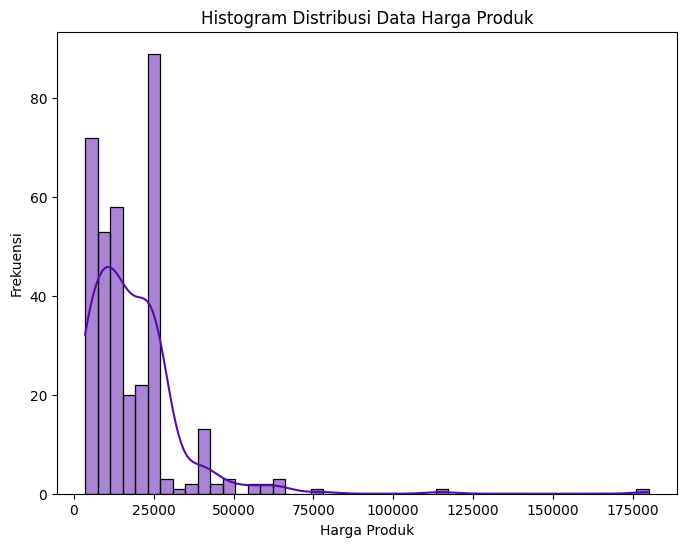

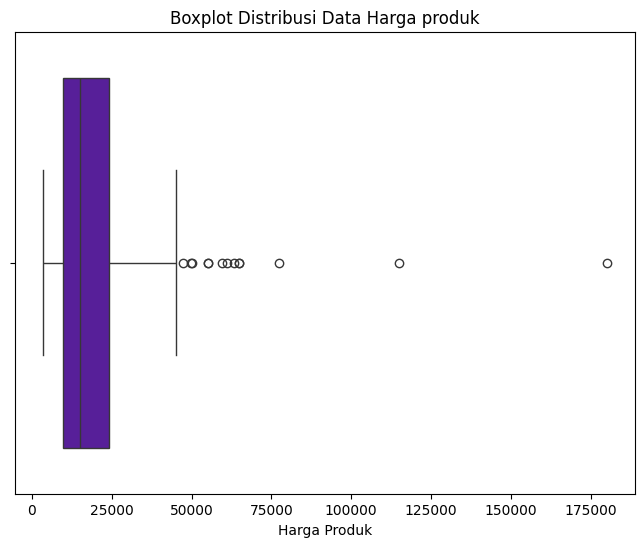

Skewness: 4.371
Kurtosis: 35.5


In [39]:
# Histogram Untuk Melihat Sebaran Data
plt.figure(figsize=(8, 6))
sns.histplot(df['Harga Produk'], kde=True, color='#560BAD', edgecolor='black')
plt.title('Histogram Distribusi Data Harga Produk')
plt.xlabel('Harga Produk')
plt.ylabel('Frekuensi')
plt.show()

# Boxplot untuk Melihat Distribusi Data dan Identifikasi Outlier
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Harga Produk'], color='#560BAD')
plt.title('Boxplot Distribusi Data Harga produk')
plt.xlabel('Harga Produk')
plt.show()

# Periksa Skewness dan Kurtosis
skewness = df['Harga Produk'].skew().round(3)
kurtosis = df['Harga Produk'].kurtosis().round(3)

print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

**Interpretasi #8:**

Dari data diketahui nilai `Rata-rata Harga Produk` adalah Rp 18348.121, `Median Harga Produk` adalah Rp 15000.0 sehingga distribusi data yang menggambarkan data ini adalah *Positive Skew*. Hal ini dibuktikan dari gambar grafik pada harga produk ekor distribusi lebih panjang ke sisi kanan. Penyebab dari kasus ini dikarenakan adanya outlier yang memiliki pengaruh besar dalam rata-rata. Dalam kondisi aktualnya banyak produk yang memiliki harga tinggi dibandingkan rata-rata keseluruhan. Untuk menggambarkan data yang lebih akurat digunakan median yang memberikan kondisi akurat tentang harga tengah dari produk yaitu sebesar Rp 15000.0. Pada data juga diketahui `Modus Harga Produk` adalah Rp 23750 yang dimana pada kondisi aktualnya harga produk yang umumnya dijual. Untuk `nilai IQR` diketahui memiliki nilai 14100.0 dimana harga ` nilai terendah (Q1)` adalah Rp 9900.0 dan `nilai tertinggi (Q3)` adalah Rp 24000.0. Pada kondisi aktual sebaran harga produk cukup variatif karena umumnya orang orang akan menjual dengan harga sekitar nilai titik terendah hingga nilai tertinggi. `Standar Deviasi` juga memiliki peran penting dalam pengambilan harga yang dimana memberikan informasi tentang seberapa bervariasinya harga produk dari harga rata-rata dalam data ini diketahui memiliki nilai Rp 15784.644. Untuk `Skewness` yang memiliki nilai positif yaitu 4.371 membuktikan bahwa harga produk lebih tinggi dari rata-rata pasaran sedangkan untuk nilai `Kurtosis` sebesar 35.5 menunjukkan bentuk *Leptokurtic* yang dimana memiliki puncak yang lebih tinggi. Hal ini menunjukkan data cenderung berkumpul secara sangat kuat di sekitar nilai rata-rata. Sehingga menunjukkan sebagian besar produk memiliki harga yang serupa.

Distribusi Data - Banyaknya Terjual

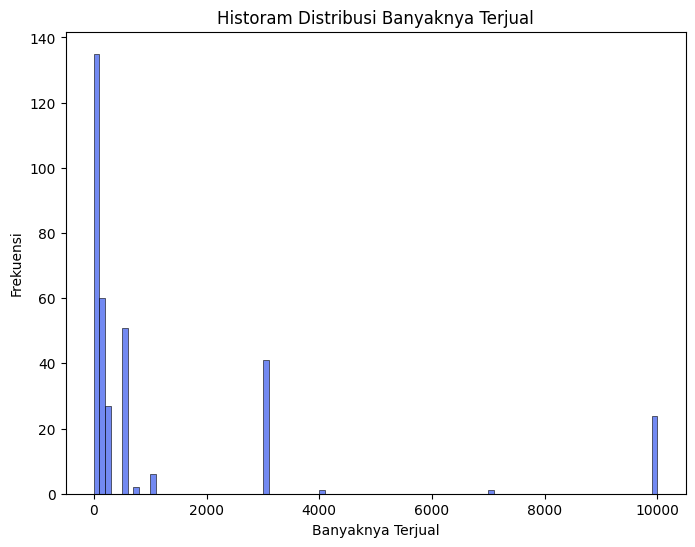

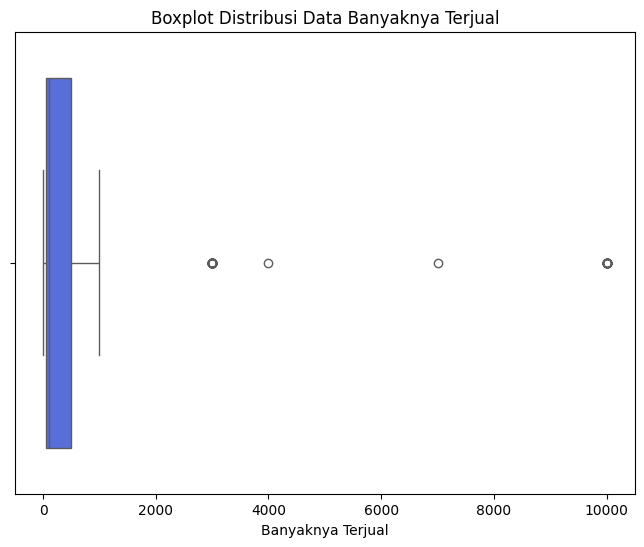

Skewness: 2.708
Kurtosis: 6.318


In [40]:
# Histogram Untuk Melihat Sebaran Data
plt.figure(figsize=(8, 6))
sns.histplot(x=df['Banyaknya Terjual'], bins=100, color='#4361EE')
plt.title('Historam Distribusi Banyaknya Terjual')
plt.xlabel('Banyaknya Terjual')
plt.ylabel('Frekuensi')
plt.show()


# Boxplot untuk Melihat Distribusi Data dan Identifikasi Outlier
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Banyaknya Terjual'], color='#4361EE')
plt.title('Boxplot Distribusi Data Banyaknya Terjual')
plt.xlabel('Banyaknya Terjual')
plt.show()

# Periksa Skewness dan Kurtosis
skewness = df['Banyaknya Terjual'].skew().round(3)
kurtosis = df['Banyaknya Terjual'].kurtosis().round(3)

print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

**Interpretasi #9:**

Dari data diketahui nilai `Rata-rata Banyaknya Produk Terjual` adalah 1223 unit, `Median Banyaknya Produk Terjual` adalah 100 unit sehingga distribusi data yang menggambarkan data ini adalah *Positive Skew*. Hal ini dibuktikan dari gambar grafik pada banyaknya produk terjual distribusi lebih panjang ke sisi kanan. Penyebab dari kasus ini dikarenakan adanya outlier yang memiliki pengaruh besar dalam rata-rata. Dalam kondisi aktualnya banyak produk yang memiliki minat tinggi dibandingkan rata-rata keseluruhan. Untuk menggambarkan data yang lebih akurat digunakan median yang memberikan kondisi akurat tentang banyak produk yang terjual yaitu sebesar 100 unit yang dalam hal ini adalah penjualan yang wajar. Untuk `nilai IQR` diketahui memiliki nilai 442 dimana banyaknya produk terjual ` nilai terendah (Q1)` adalah 58 dan `nilai tertinggi (Q3)` adalah 500. Pada kondisi aktual banyaknya produk terjual cukup variatif karena umumnya produk yang laku berkisar nilai titik terendah hingga nilai tertinggi. `Standar Deviasi` juga memiliki peran penting dalam meberikan keragaman produk yang terjual yang dimana diketahui memiliki nilai 2594. Nilai ini cukup tinggi sehingga memiliki resiko yang lebih besar terkait dengan fluktuasi penjualan. Untuk `Skewness` yang memiliki nilai positif yaitu 2.708 membuktikan banyak produk yang terjual lebih tinggi dari rata-rata pasaran sedangkan untuk nilai `Kurtosis` sebesar 6.318 menunjukkan bentuk *Leptokurtic* yang dimana memiliki puncak yang lebih tinggi. Hal ini menunjukkan menunjukkan penjualan produk yang sangat tinggi yang memengaruhi rata-rata dan membuat distribusi menjadi lebih tajam

Distribusi Data - Rating Produk

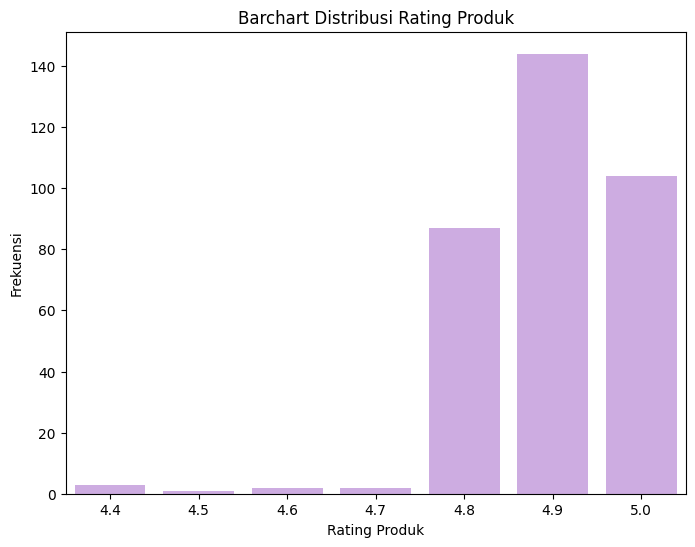

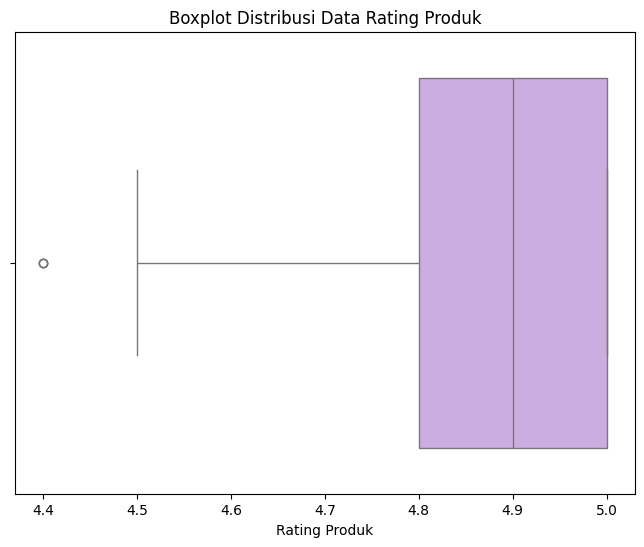

Skewness: -1.585
Kurtosis: 5.985


In [41]:
# Barchart Untuk Melihat Sebaran Data
plt.figure(figsize=(8, 6))
sns.countplot(x=df['Rating Produk'], color='#CFA3EA')
plt.title('Barchart Distribusi Rating Produk')
plt.xlabel('Rating Produk')
plt.ylabel('Frekuensi')
plt.show()

# Boxplot untuk Melihat Distribusi Data dan Identifikasi Outlier
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Rating Produk'], color='#CFA3EA')
plt.title('Boxplot Distribusi Data Rating Produk')
plt.xlabel('Rating Produk')
plt.show()

# Periksa Skewness dan Kurtosis
skewness = df['Rating Produk'].skew().round(3)
kurtosis = df['Rating Produk'].kurtosis().round(3)

print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

**Interpretasi #10:**

Dari data diketahui nilai `Rata-rata Banyaknya Rating` dan `Median Banyaknya Produk Terjual` adalah 4.9 unit sehingga distribusi data yang menggambarkan data ini bedasarkan rata-rata dan median adalah *Symmetrical Distribution*. Namun, pada gambar grafik rating produk memiliki outlier. Penyebab dari kasus ini dikarenakan diberikan data yang bernilai 0 untuk mengatasi *missing value* selain itu pelanggan juga memberikan rating yang lebih variasi. Sehingga distribusi data yang menggambarkan data ini adalah *Negative Skew*. Dalam kondisi aktualnya banyak pelanggan yang memiliki minat tinggi terhadap produk. Untuk `nilai IQR` diketahui memiliki nilai 0.2 dimana banyaknya produk terjual ` nilai terendah (Q1)` adalah 4.8 dan `nilai tertinggi (Q3)` adalah 5.0. Pada kondisi aktual banyak pelanggan yang cukup konsistem memberikan rating tinggi pada produk. `Standar Deviasi` juga memiliki peran penting dalam meberikan keragaman rating produk yang dimana diketahui memiliki nilai 0.0095. Nilai ini cukup rendah yang menunjukkan rating produk cenderung stabil dan konsisten. Untuk `Skewness` yang memiliki nilai negatif yaitu -1.585 membuktikan pelanggan cenderung memberikan banyak rating produk yang lebih tinggi sedangkan untuk nilai `Kurtosis` sebesar 5.985 menunjukkan bentuk *Leptokurtic* yang dimana memiliki puncak yang lebih tinggi. Hal ini menunjukkan adanya peningkatan rating produk yang sangat tinggi yang memengaruhi rata-rata dan membuat distribusi menjadi lebih tajam

---

2. Hitung pendapatan minimum dan maksimum dari data menggunakan metode *confidence interval* sehingga didapat lower value dan upper value dari distribusi populasi pendapatan. Pada kasus ini akan dianggap data terdistribusi normal dengan *confidence level* mencapai 95% dan informasi produk terjual merupakan penjualan produk per bulan

In [42]:
# Mernghitung nilai Lower dan Upper Limit Untuk Banyaknya Terjual
std = df["Banyaknya Terjual"].std()
N = len(df["Banyaknya Terjual"])
low_banyak_terjual, up_banyak_terjual = stats.norm.interval(0.95,loc=df["Banyaknya Terjual"].mean(), scale = std / np.sqrt(N))
print('Lower Limit:', low_banyak_terjual.round(0))
print('Upper Limit:', up_banyak_terjual.round(0))

Lower Limit: 951.0
Upper Limit: 1496.0


In [43]:
# Mernghitung nilai Lower dan Upper Limit Untuk Harga Produk
std = df["Harga Produk"].std()
N = len(df["Harga Produk"])
low_harga_produk, up_harga_produk = stats.norm.interval(0.95,loc=df["Harga Produk"].mean(), scale = std / np.sqrt(N))
print('Lower Limit: Rp', low_harga_produk.round(3))
print('Upper Limit: Rp', up_harga_produk.round(3))

Lower Limit: Rp 16689.706
Upper Limit: Rp 20006.536


In [44]:
# Menghitung Pendapatan Minimun dan Pendaptan Maksimum
pendapatan_minimum = low_banyak_terjual * low_harga_produk
pendapatan_maksimum = up_banyak_terjual * up_harga_produk
print('Pendapatan Minimum: Rp', pendapatan_minimum.round(3))
print('Pendapatan Maksimum: Rp', pendapatan_maksimum.round(3))

Pendapatan Minimum: Rp 15866615.468
Pendapatan Maksimum: Rp 29926925.908


**Interpretasi #11:**

Setelah dilakukan pengujian dengan metode *confidence interval* dengan *confidence level* mencapai 95% persen, akan didapat nilai terendah yang direkomendasikan untuk jumlah produk terjual yakni 951 unit dan tertinggi 1496 unit dengan harga jual terendah Rp 16689.706 dan tertinggi Rp 20006.536 Sehingga didapat pendapatan minimal Rp 15866615.468 untuk total seluruh unit pada rekomendasi jumlah produk terendah yang harus distock dan pendapatan maksimal yakni Rp 29926925.908 untuk total seluruh unit pada rekomendasi jumlah produk tertinggi yang harus distock

---

3. Lakukan uji coba secara hipotesis apakah harga barang di Jabodetabek dan di luar Jabodetabek berbeda


Untuk menjawab pertanyaan akan dilakukan pengujian hipotesis:

H0 = Tidak ada perbedaan harga barang antara Jabodetabek dan luar Jabodetabek

H1 = Ada perbedaan harga barang antara Jabodetabek dan luar Jabodetabek

In [45]:
# Melihat Jumlah Nilai pada Kota Toko 
df["Kota Toko"].value_counts()

Kota Toko
Depok                 57
Tangerang Selatan     52
Kab. Garut            47
Jakarta Barat         41
Jakarta Selatan       39
Jakarta Timur         26
Bandung               13
Kab. Bandung          12
Kab. Bogor            10
Surakarta             10
Kab. Sidoarjo         10
Kab. Tangerang         9
Surabaya               5
Jakarta Pusat          4
Tangerang              3
Cimahi                 3
Kab. Bekasi            1
Semarang               1
Jakarta Utara          1
Kab. Bandung Barat     1
Malang                 1
Bogor                  1
Kab. Sleman            1
Name: count, dtype: int64

Dari data di atas diketahui bahwa yang termasuk Jabodetabek dan non-Jabodetabek adalah sebagai berikut:

Kategori | Daerah
---|---
Jabodetabek  | Depok, Tangerang Selatan, Jakarta Barat, Jakarta Selatan, Jakarta Timur, Kab. Bogor, Kab. Tangerang, Jakarta Pusat, Tangerang, Jakarta Utara, Bogor 
Non-Jabodetabek | Kab. Garut, Bandung, Kab. Bandung, Surakarta, Kab. Sidoarjo, Surabaya, Cimahi, Kab. Bekasi, Semarang, Kab. Bandung Barat, Malang, Kab. Sleman             


In [52]:
# Membuat Variabel Harga Jabodetabek
harga_jabodetabek = df[df["Kota Toko"].isin(["Depok", "Tangerang Selatan", "Jakarta Barat", "Jakarta Selatan", "Jakarta Timur", "Kab. Bogor", "Kab. Tangerang", "Jakarta Pusat", "Tangerang", "Jakarta Utara", "Bogor", "Kab. Bekasi"])][["Kota Toko", "Harga Produk"]]
harga_jabodetabek.head()

,Kota Toko,Harga Produk
4,Jakarta Barat,4180
5,Depok,23750
6,Depok,9900
7,Jakarta Timur,14725
8,Depok,23750


In [47]:
# Membuat Variabel Harga Non-Jabodetabek
harga_non_jabodetabek = df[df["Kota Toko"].isin(["Kab. Garut", "Bandung", "Kab. Bandung", "Surakarta", "Kab. Sidoarjo", "Surabaya", "Cimahi", "Semarang", "Kab. Bandung Barat", "Malang", "Kab. Sleman"])][["Kota Toko", "Harga Produk"]]
harga_non_jabodetabek.head()

,Kota Toko,Harga Produk
3,Bandung,19800
21,Surakarta,16000
22,Kab. Bandung,13999
27,Kab. Garut,15000
33,Kab. Sidoarjo,11500


In [48]:
# Pengujian Hipotesis
t_stat, p_val = stats.ttest_ind(harga_jabodetabek["Harga Produk"], harga_non_jabodetabek["Harga Produk"])
print('T-Statistic:',t_stat.round(3))
print('P-value:',p_val.round(3)) 

T-Statistic: 1.155
P-value: 0.249


**Interpretasi #12:**

Untuk menjawab pertanyaan ini akan dilakuan dengan menggunakan hipotesis yakni hipotesis H0 dan H1 seperti yang dipaparkan sebelumnya. Maka hal yang harus dilakukan adalah dengan mengelompokkan data untuk `Jabodetabek` dan `Non-Jabodetabek` sehingga variabe tersebut dapat dilakukan pengujian dengan bantuan `stats`. Hasil dari pengujian akan menghasilkan nilai T-Statistic dan P-Value. Untuk nilai T-Statistic memiliki nilai 1.184 memiliki makna bahwa harga rata-rata produk di Jabodetabek cenderung lebih tinggi daripada di luar Jabodetabek. Namun, karena nilainya tidak jauh dari angka 0 maka kekukatannya relatif rendah. Untuk membuktikan itu perlu dilakukan pengujian P-Value yang dimana mendapatkan nilai 0.237. Angka ini lebih besar dari signifikasi yang umum digunakan yaitu 0.05 sehingga tidak ditemukan cukup bukti untuk menolak hipotesis nol. Sehingga H0 diterima yakni Tidak ada perbedaan harga barang antara Jabodetabek dan luar Jabodetabek

---

4. Apakah orang lebih cenderung suka dengan produk yang harganya murah?

Untuk menemukan jawaban dari pertanyaan akan digunakan hipotesis berikut:

H0 = Tidak ada korelasi antara harga produk dan banyaknya terjual

H1 = Ada korelasi antara harga produk dan banyaknya terjual

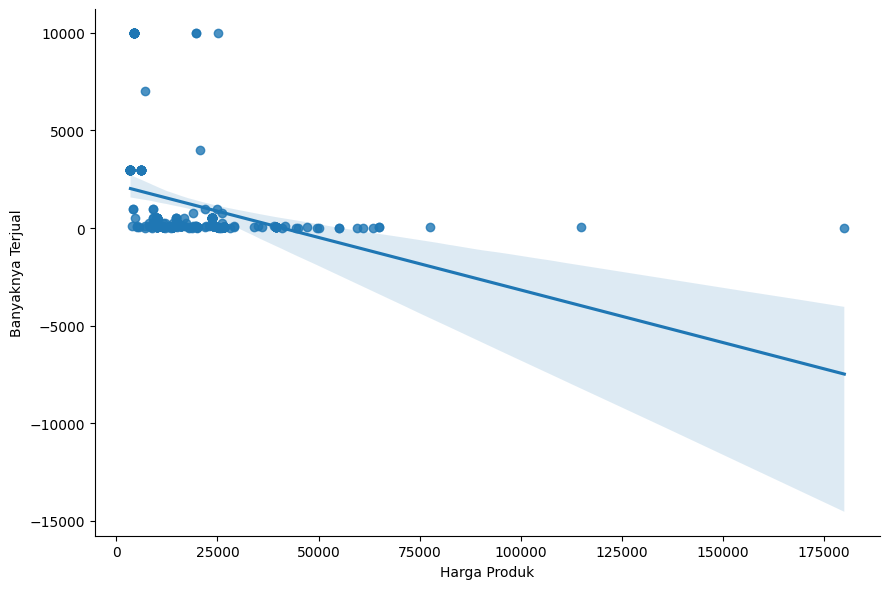

In [49]:
# Menampilkan Grafik Analisis Korelasi
sns.lmplot(data=df, x="Harga Produk", y="Banyaknya Terjual", height=6, aspect=1.5)

In [53]:
# Menmpilkan Informasi Analisis Korelasi
corr_rho, pval_s = stats.spearmanr(df['Harga Produk'], df['Banyaknya Terjual'])
print(f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")


rho-correlation: -0.58, p-value: 4.8247152841624333e-32


Interpretasi #13:

Dari data didapat nilai *correlation* untuk setiap metodenya memiliki nilai negatif hal itu menandakan hubungan linier yang negatif. Untuk nilai p-value sangat kecil untuk setiap *correlation* menunjukkan bahwa korelasi ini sangat signifikan secara statistik. Hal ini terbukti dari nilai p-value yang lebih rendah dari 0,05. Dari hasil tersebut, kita dapat menyimpulkan bahwa terdapat hubungan yang signifikan secara statistik antara harga produk dan banyaknya terjual. Korelasi ini menunjukkan bahwa, secara umum, semakin tinggi harga produk, semakin rendah jumlah penjualan, dan sebaliknya.   

---

#### **Kesimpulan**

Dari analisa data yang telah dilakukan, adapun rekomendasi yang bisa diberikan adalah:

1. Seperti pada interpretasi #11, Harga produk seblak yang bisa dijual untuk mendapatkan keuntungan maksimal berkisar Rp 20000 namun hal itu terlalu sulit dikarenakan harga terlalu mahal jika ingin bersaing dengan kompetitor dengan harga sama yaitu kylafood dan apabila bukan mengambil produk dari Kylafood sebagai produk dropshipper. Oleh karena itu, untuk mengatasi permsalahan harga saya merekomendasikan untuk menjual seblak di kisaran harga Rp 5000 hingga Rp 10000. Karena bedasarkan interpretasi #13, semakin tinggi harga produk, konsumen cenderung untuk tidak memilih produk tersebut. Selain itu, karena keterbatasan akan biaya produksi namun cukup untuk biaya promosi, dengan harga diantara Rp 5000 hingga Rp 10000 tidak terlalu berat sehingga bisa mengatasi permasalahan akan biaya. 

2. Terkait dengan kesimpulan pertama, dengan menjual produk di harga Rp 5000 hingga Rp 10000, pastikan untuk menyiapkan budget semaksimal mungkin untuk 100 unit produk seblak. Dari data banyaknya produk seblak yang terjual, penjualan terbanyak untuk 1 jenis seblak adalah 100. Hal ini bertujuan untuk mengantisipasi kerugian.  

3. Karena harga biaya produksi untuk Jabodetabek dan Non-Jabodetabek itu berbeda, maka penjual harus mengetahui target pasar yang ingin diincar. Selain itu kalkulasi jarak juga menjadi paremeter yang bisa dipertimbangkan. Jika penjual adalah orang yang berada di daerah Jabodetabek, maka bisa mencari produk seblak yang murah namun bisa menjual di harga maksimal yaitu Rp 10000 namun perlu adanya kalkulasi dengan biaya ongkos kirim. Sebaliknya jika penjual berada di luar Jabodetabek, maka penjual bisa memakai produk yang tidak jauh dari lokasi penjual untuk menghemat biaya ongkos kirim. Namun untuk harga produk mungkin bisa lebih dari Rp 10000. Kondisi ini terpenuhi jika mendapatkan konsumen yang berada di sekitar daerah penjual.

4. Pada data ditemukan adanya outlier pada bagian banyaknya terjual. Hal ini dikarenakan produk seblak ini mendadak *booming* atau viral sehingga terjadi banyak penjualan yang tidak wajar. Penjual perlu memperhatikan kondisi lapangan sejauh apa mana *trend* produk ini masih ada. Selain itu, data outlier pada harga produk dikarenakan alasan yang sama. Direkomendasikan kepada penjual untuk mencoba dan mendapatkan keuntungan selama 3 bulan. Kemudian, dilakukan *review* kembali mengenai permasalahan harga dan produk yang terjual. Pertimbangannya adalah untuk mengetahui sejauh mana *trend* seblak apakah akan berakhir atau bisa berlanjut.

5. Untuk mengenai rating produk, perlu diperhatikan jenis produk mana yang bisa dijual. Namun, itu tidak terlalu untuk diperhatikan karena konsumen cenderung memberikan rating baik untuk setiap produk seblak.